Machine learning steps

In [9]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [23]:

import ssl
import certifi

# use certifi's CA bundle to avoid SSL certificate verify errors
# ssl.create_default_context(...) returns an SSLContext object, so assign a callable that returns it
ssl._create_default_https_context = lambda *args, **kwargs: ssl.create_default_context(cafile=certifi.where())

from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
dataset.keys()
print(dataset.DESCR)
print("Example target values (first 10):", dataset.target[:10])


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [11]:
# Convert the fetched sklearn dataset into a pandas DataFrame and show the first 5 rows
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MedHouseVal'] = dataset.target
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [12]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [13]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [14]:
#df.iloc[row_selector, col_selector] 
X= df.iloc[:,:-1]
y= df.iloc[: , -1] 

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[ 1.26234384, -0.53101448,  0.27032004, ...,  0.0236738 ,
         0.83879294, -1.14712104],
       [ 0.9817486 , -0.13168398,  0.39059794, ..., -0.02012301,
         0.78731878, -1.23207526],
       [-0.90468424,  0.18778041, -0.76758041, ...,  0.16626879,
        -0.76158559,  0.66190422],
       ...,
       [-1.33012814,  0.10791431,  1.21822002, ..., -0.09527999,
        -0.66331673,  2.02616912],
       [ 0.42019193, -1.16994327,  0.15634901, ..., -0.0223729 ,
        -0.91600808,  0.89677766],
       [-0.77474416, -0.29141618, -0.24488748, ..., -0.13669136,
        -0.94876436,  0.93175881]], shape=(14448, 8))

In [17]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
model.coef_

array([ 0.82010952,  0.11671802, -0.25311962,  0.29549024, -0.00201354,
       -0.03991216, -0.91586288, -0.88084288])

In [18]:
%pip install seaborn --quiet
# seaborn is used for the distribution plot
import seaborn as sns

pred = model.predict(X_test)
residuals = y_test - pred


--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/Library/

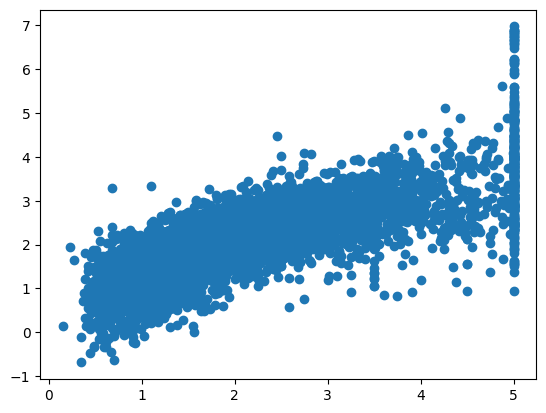

In [19]:
from matplotlib import pyplot as plt
plt.scatter(y_test,pred)

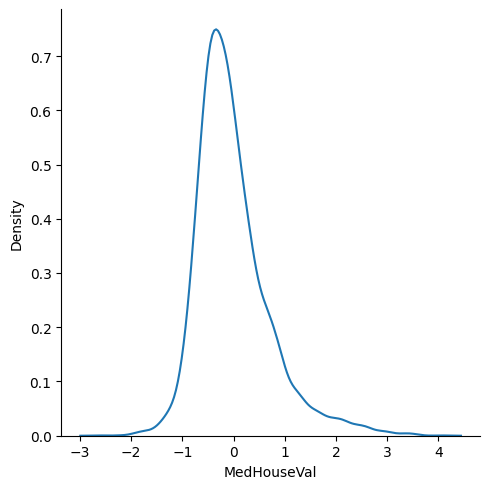

In [20]:
sns.displot(residuals, kind='kde')
#there are some noise or outliers but we get anormal distribution

In [21]:
from sklearn.metrics import root_mean_squared_error
rmse = print(np.sqrt(root_mean_squared_error(y_test, pred)))

0.8469204645682921


Pickling model for deployment

In [22]:
import pickle
pickle.dump(model,open('regmodel.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))
#we can read pickled file using readmode
pickled_model= pickle.load(open('regmodel.pkl','rb'))
pickled_model.predict(X_test)

array([1.58325109, 6.81265965, 3.01407472, ..., 2.75092212, 2.12183527,
       2.32981751], shape=(6192,))